## Diabetes Health Indicators Dataset

|      Column Name     | Meaning                                                                                                                                                                                                                                                                                                                                 |
|:--------------------:|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|     Diabetes_012     | 0 = no diabetes 1 = prediabetes 2 = diabetes                                                                                                                                                                                                                                                                                            |
|        HighBP        | 0 = no high BP 1 = high BP                                                                                                                                                                                                                                                                                                              |
|        HighCol       | 0 = no high cholesterol 1 = high cholesterol                                                                                                                                                                                                                                                                                            |
|       CholCheck      | 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years                                                                                                                                                                                                                                                                |
|          BMI         | Body Mass Index                                                                                                                                                                                                                                                                                                                         |
|        Smoker        | Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes                                                                                                                                                                                                                            |
|        Stroke        | (Ever told) you had a stroke. 0 = no 1 = yes                                                                                                                                                                                                                                                                                            |
| HeartDiseaseorAttack | coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes                                                                                                                                                                                                                                                               |
|     PhysActivity     | physical activity in past 30 days - not including job 0 = no 1 = yes                                                                                                                                                                                                                                                                    |
|        Fruits        | Consume Fruit 1 or more times per day 0 = no 1 = yes                                                                                                                                                                                                                                                                                    |
|        Veggies       | Consume Vegetables 1 or more times per day 0 = no 1 = yes                                                                                                                                                                                                                                                                               |
|     AnyHealthcare    | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes                                                                                                                                                                                                                       |
|        GenHlth       | Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor                                                                                                                                                                                                                          |
|       MentHlth       | Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days                                                                                                                                        |
|       PhysHlth       | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days                                                                                                                                                       |
|       DiffWalk       | Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes                                                                                                                                                                                                                                                               |
|          Sex         | 0 = female 1 = male                                                                                                                                                                                                                                                                                                                     |
|          Age         | Age                                                                                                                                                                                                                                                                                                                                     |
|       Education      | Education level (EDUCA see codebook) scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate) |
|        Income        | Income scale (INCOME2 see codebook) scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more                                                                                                                                                                                                                           |
|   HvyAlcoholConsump  | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes                                                                                                                                                                                                        |
|      NoDocbcCost     | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes                                                                                                                                                                                                                    |

In [1]:
import pandas as pd
import numpy as np
import json
pd.set_option('max_columns', None)

from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, classification_report, recall_score

In [2]:
df_diab = pd.read_csv('data/diabetes_data.csv')
df_heart = pd.read_csv('data/heart_disease_data.csv')

In [3]:
df_heart.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,IsMale
0,40,True,289,False,172,False,0.0,1,False,False,True,False,False,False,True,False,True
1,49,True,180,False,156,False,1.0,0,True,False,False,True,False,False,True,False,False
2,37,True,283,False,98,False,0.0,1,False,False,True,False,False,False,False,True,True
3,48,True,214,False,108,True,1.5,0,True,True,False,False,False,False,True,False,False
4,54,True,195,False,122,False,0.0,1,False,False,False,True,False,False,True,False,True


In [4]:
df_diab.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,IsMale,Diabetes
0,False,False,False,66.0,False,False,False,False,True,True,False,True,False,5.0,0.0,30.0,True,9.0,4.0,5.0,False,True
1,False,False,False,34.0,False,False,False,True,False,True,False,True,False,3.0,0.0,0.0,False,7.0,6.0,8.0,False,True
2,False,False,False,30.0,False,False,False,True,True,True,False,True,False,3.0,0.0,2.0,False,6.0,6.0,8.0,True,True
3,False,False,False,39.0,False,False,False,True,True,True,False,True,False,2.0,2.0,10.0,True,4.0,5.0,5.0,False,True
4,False,False,False,37.0,True,False,False,False,False,True,False,True,False,2.0,0.0,0.0,False,7.0,6.0,7.0,True,True


# Algorithms to Explore
* Decision Trees (with pruning)
* Neural Network
* Boosting (GB)
* SVM
* kNN

In [5]:
X_diab = df_diab.drop('Diabetes', axis=1)
y_diab = df_diab['Diabetes']

X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(X_diab, y_diab, random_state=0)

In [6]:
X_heart = df_heart.drop('HeartDisease', axis=1)
y_heart = df_heart['HeartDisease']

X_train_heart, X_test_heart, y_train_heart, y_test_heart = train_test_split(X_heart, y_heart, random_state=0)

## Decision Tree
Pruning

#### Hyperparameters
* impurity : The impurity measure defines how well a number of classes are separated. In general, the impurity measure should be largest when data are split evenly for attribute values and should be zero when all data belong to the same class.
* min_samples_leaf
    * needs to be changed to greater than one so there is more than one data point per leaf (avoids overfitting)
    * The paper, An empirical study on hyperparameter tuning of decision trees [5] also states that the ideal min_samples_leaf values tend to be between 1 to 20 for the CART algorithm. This paper also indicates that min_samples_split and min_samples_leaf are the most responsible for the performance of the final trees from their relative importance analysis [5].
* min_weight_fraction_leaf
    * deals with an imbalanced dataset
    * Class balancing can be done by sampling an equal number of samples from each class, or preferably by normalizing the sum of the sample weights for each class to the same value.
* max_features 
    * can reduce computational complexity by reducing the number of features examined for a split - default is all features
* class_weight
    * can even out the dataset - look at how many times larger False is than True and weight accordingly

Approach -
1. start by training a basic model, no pruning 
2. report results
3. prune tree depth and reanalyze

In [7]:
def dt_tree_validation(X_train, y_train, X_test, y_test, param, min_val, max_val, step=1, params={}):
    scores = []
    best_score = 0
    values = [val for val in np.arange(min_val, max_val, step)]
    for value in values:
        params.update({'random_state':0, param: value})
        cur_dt = DecisionTreeClassifier(**params)
        cur_dt.fit(X_train, y_train)
        cur_score = get_recall(cur_dt, X_test, y_test)
        scores.append(cur_score)
        if cur_score > best_score:
            best_score = cur_score
            print(f'best score: {best_score} --- {param}: {value}', end='\r')
    print(end='\n')
    return scores, values

In [8]:
def get_recall(model, X_test, y_test):
    y_pred = model.predict(X_test)
    recall = classification_report(y_test, y_pred, output_dict=True)['True']['recall']
    return recall

In [9]:
dt_baseline_diab = DecisionTreeClassifier(random_state=0)
dt_baseline_diab.fit(X_train_diab, y_train_diab)
print('diabetes baseline score:', get_recall(dt_baseline_diab, X_test_diab, y_test_diab))

max_depth_diab = dt_baseline_diab.get_depth()
min_depth_diab = 1

diabetes baseline score: 0.6446070633153038


In [10]:
dt_baseline_heart = DecisionTreeClassifier(random_state=0)
dt_baseline_heart.fit(X_train_heart, y_train_heart)
print('heart disease baseline score:', get_recall(dt_baseline_heart,X_test_heart, y_test_heart))

max_depth_heart = dt_baseline_heart.get_depth()
min_depth_heart = 1

heart disease baseline score: 0.8151260504201681


Diabetes
best score: 0.8717785555202037 --- max_depth: 3

Heart Disease
best score: 0.9327731092436975 --- max_depth: 2


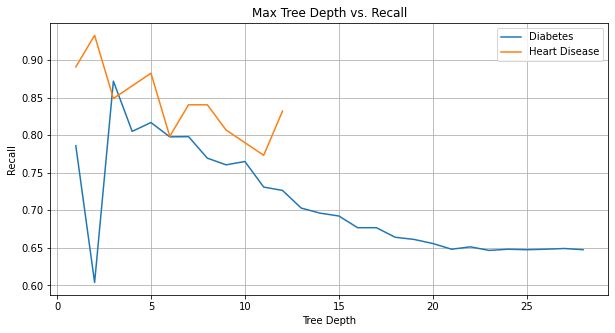

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
print('Diabetes')
diab_depth_scores, diab_depth_values = dt_tree_validation(X_train_diab, y_train_diab, 
                                                          X_test_diab, y_test_diab,
                                                          'max_depth', min_depth_diab, max_depth_diab)
print('\nHeart Disease')
heart_depth_scores, heart_depth_values = dt_tree_validation(X_train_heart, y_train_heart, 
                                                          X_test_heart, y_test_heart,
                                                          'max_depth', min_depth_heart, max_depth_heart)
ax.plot(diab_depth_values, diab_depth_scores, label='Diabetes')
ax.plot(heart_depth_values, heart_depth_scores, label='Heart Disease')
ax.grid()
ax.set_xlabel('Tree Depth')
ax.set_title('Max Tree Depth vs. Recall')
plt.legend()
ax.set_ylabel('Recall');

Diabetes
best score: 0.8717785555202037 --- min_samples_leaf: 0.001

Heart Disease
best score: 0.9411764705882353 --- min_samples_leaf: 0.066


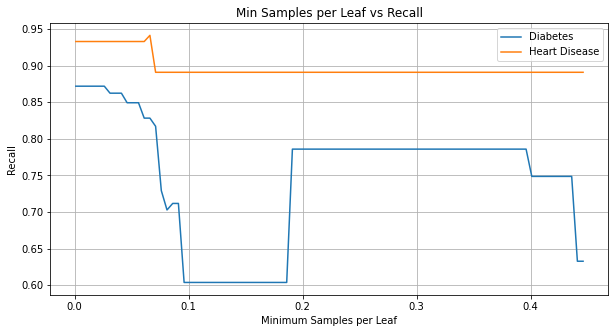

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
print('Diabetes')
diab_depth_scores, diab_depth_values = dt_tree_validation(X_train_diab, y_train_diab, 
                                                          X_test_diab, y_test_diab,
                                                          'min_samples_leaf', 0.001, .45, .005,
                                                          params={'max_depth':3})
print('\nHeart Disease')
heart_depth_scores, heart_depth_values = dt_tree_validation(X_train_heart, y_train_heart, 
                                                            X_test_heart, y_test_heart,
                                                            'min_samples_leaf', .001, .45, .005,
                                                            params={'max_depth':2})
ax.plot(diab_depth_values, diab_depth_scores, label='Diabetes')
ax.plot(heart_depth_values, heart_depth_scores, label='Heart Disease')
ax.grid()
ax.set_xlabel('Minimum Samples per Leaf')
plt.legend()
ax.set_title('Min Samples per Leaf vs Recall')
ax.set_ylabel('Recall');

Diabetes
best score: 0.8717785555202037 --- max_features: 19

Heart Disease
best score: 0.9327731092436975 --- max_features: 8


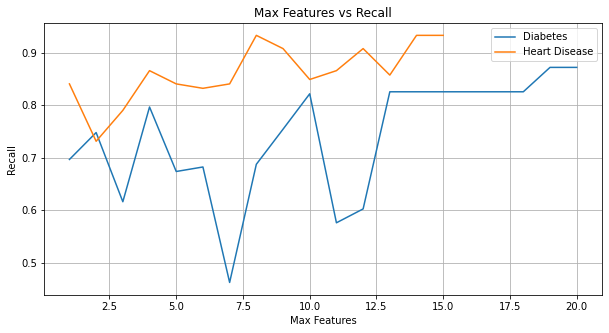

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
print('Diabetes')
diab_depth_scores, diab_depth_values = dt_tree_validation(X_train_diab, y_train_diab, 
                                                          X_test_diab, y_test_diab,
                                                          'max_features', 1, X_train_diab.shape[1],
                                                          params={'max_depth':3, 'min_samples_leaf':2})
print('\nHeart Disease')
heart_depth_scores, heart_depth_values = dt_tree_validation(X_train_heart, y_train_heart, 
                                                            X_test_heart, y_test_heart,
                                                            'max_features', 1, X_train_heart.shape[1],
                                                            params={'max_depth':4, 'min_samples_leaf':9})
ax.plot(diab_depth_values, diab_depth_scores, label='Diabetes')
ax.plot(heart_depth_values, heart_depth_scores, label='Heart Disease')
ax.grid()
ax.set_title('Max Features vs Recall')
ax.set_xlabel('Max Features')
plt.legend()
ax.set_ylabel('Recall');

In [14]:
diab_params = {'max_depth':3, 'min_samples_leaf':2, 'max_features':19, 'random_state':0}
diab_dt = DecisionTreeClassifier(**diab_params)
diab_dt.fit(X_train_diab, y_train_diab)
get_recall(diab_dt, X_test_diab, y_test_diab)

0.8717785555202037

In [15]:
heart_params = {'max_depth':4, 'min_samples_leaf':9, 'max_features':8, 'random_state':0}
heart_dt = DecisionTreeClassifier(**heart_params)
heart_dt.fit(X_train_heart, y_train_heart)
get_recall(heart_dt, X_test_heart, y_test_heart)

0.9327731092436975

In [16]:
import json
with open('params/dt_params.json', 'w') as f:
    params = {'diab':diab_params, 'heart':heart_params}
    json.dump(params, f)